In [2]:
# !pip install kagglehub
# !pip install tensorflow
# !pip install scikit-learn
# !pip install scikit-image


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
import pandas as pd

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = x_train / 255.0
x_test = x_test / 255.0

# 1.3. Dacă este necesar, adaugă un canal suplimentar pentru imagini grayscale
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

x_train shape: (60000, 28, 28, 1), y_train shape: (60000,)


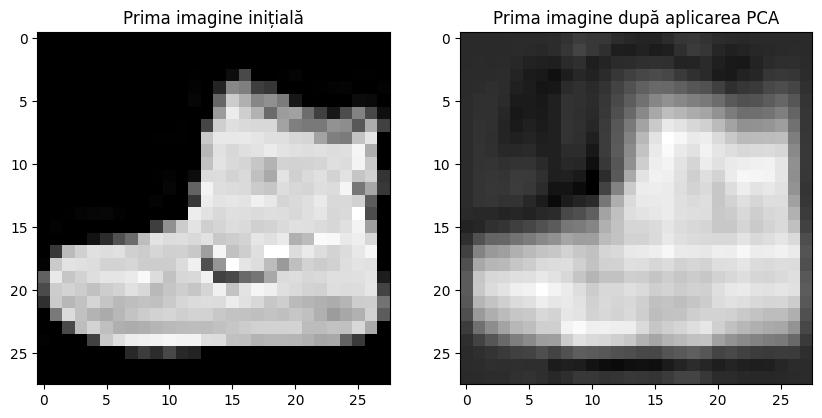

In [4]:
from sklearn.decomposition import PCA

# Reshape x_train to 2D
x_train_flat = x_train.reshape(x_train.shape[0], -1)

pca = PCA(n_components=50)
dataIn2D = pca.fit_transform(x_train_flat)
reconstructed_image_pca = pca.inverse_transform(dataIn2D[0]).reshape(28, 28)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.title("Prima imagine inițială")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_pca, cmap='gray')
plt.title("Prima imagine după aplicarea PCA")

plt.show()

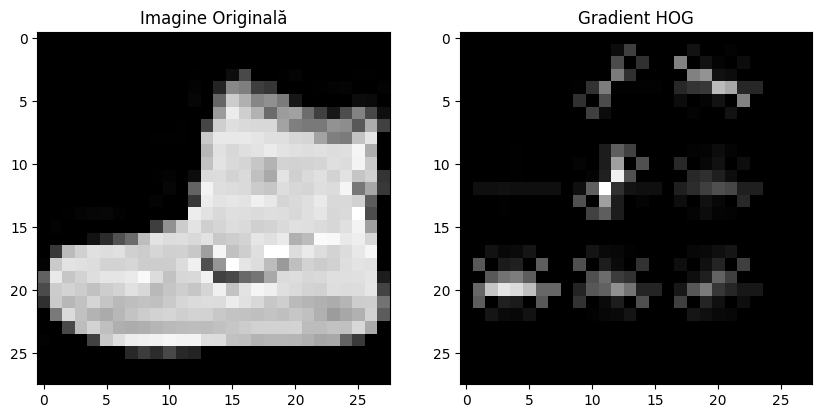

In [6]:
image_sample = x_train[0].squeeze()
_, hog_image = hog(image_sample, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), visualize=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_sample, cmap='gray')
plt.title("Imagine Originală")

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("Gradient HOG")
plt.show()


### 4.2

<Figure size 2000x800 with 0 Axes>

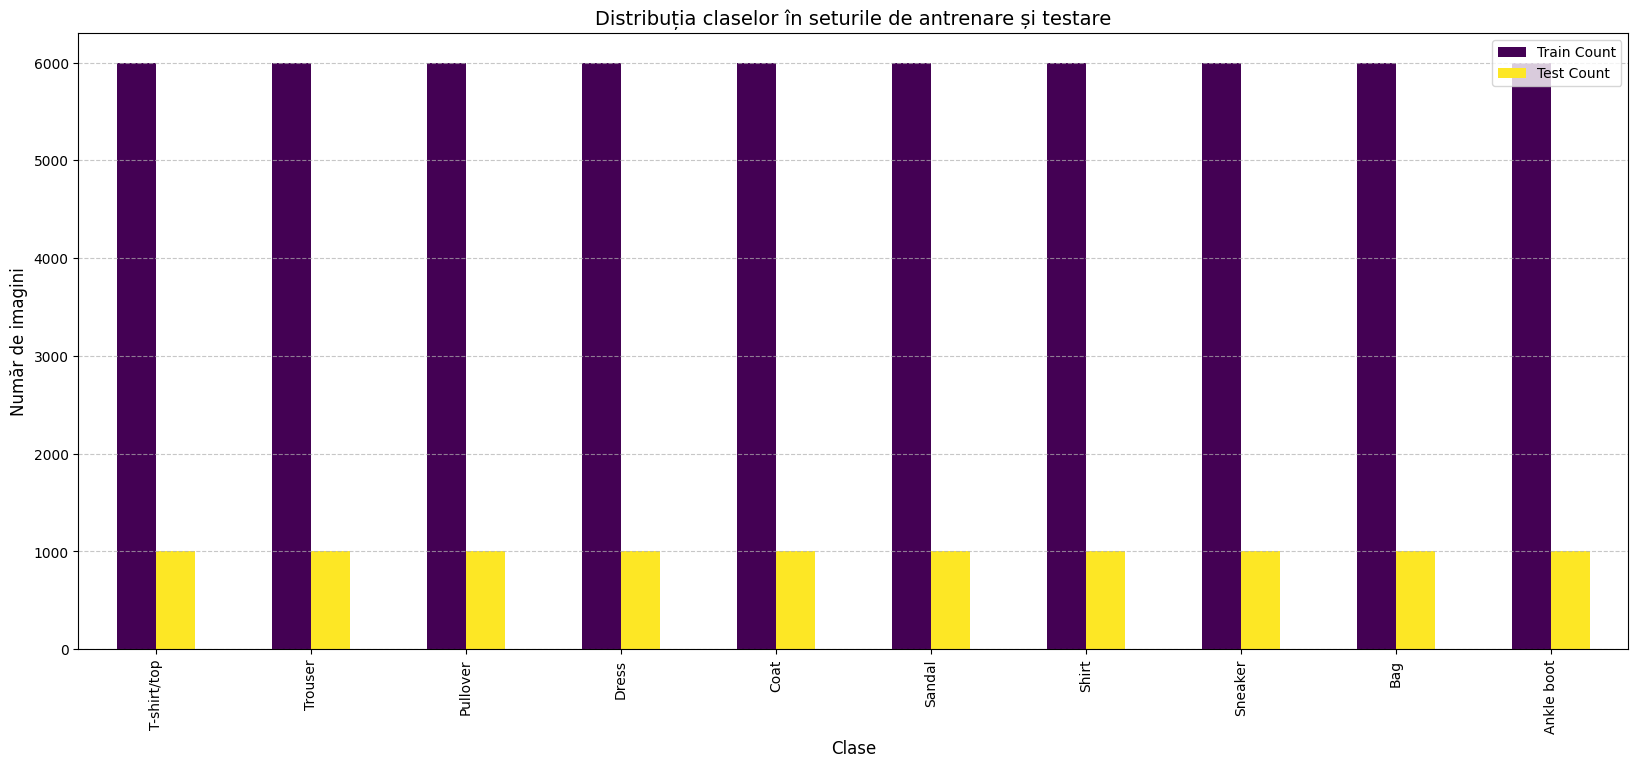

In [7]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
class_distribution_train = dict(zip(unique_train, counts_train))

unique_test, counts_test = np.unique(y_test, return_counts=True)
class_distribution_test = dict(zip(unique_test, counts_test))

# Numele claselor
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Combinare distribuții într-un singur DataFrame
combined_df = pd.DataFrame({
    'Class': class_names,
    'Train Count': class_distribution_train.values(),
    'Test Count': class_distribution_test.values()
})

# Vizualizare distribuții
plt.figure(figsize=(20, 8))
combined_df.set_index('Class').plot(kind='bar', colormap='viridis', figsize=(20, 8))
plt.xticks(rotation=90, fontsize=10)
plt.title('Distribuția claselor în seturile de antrenare și testare', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Număr de imagini', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

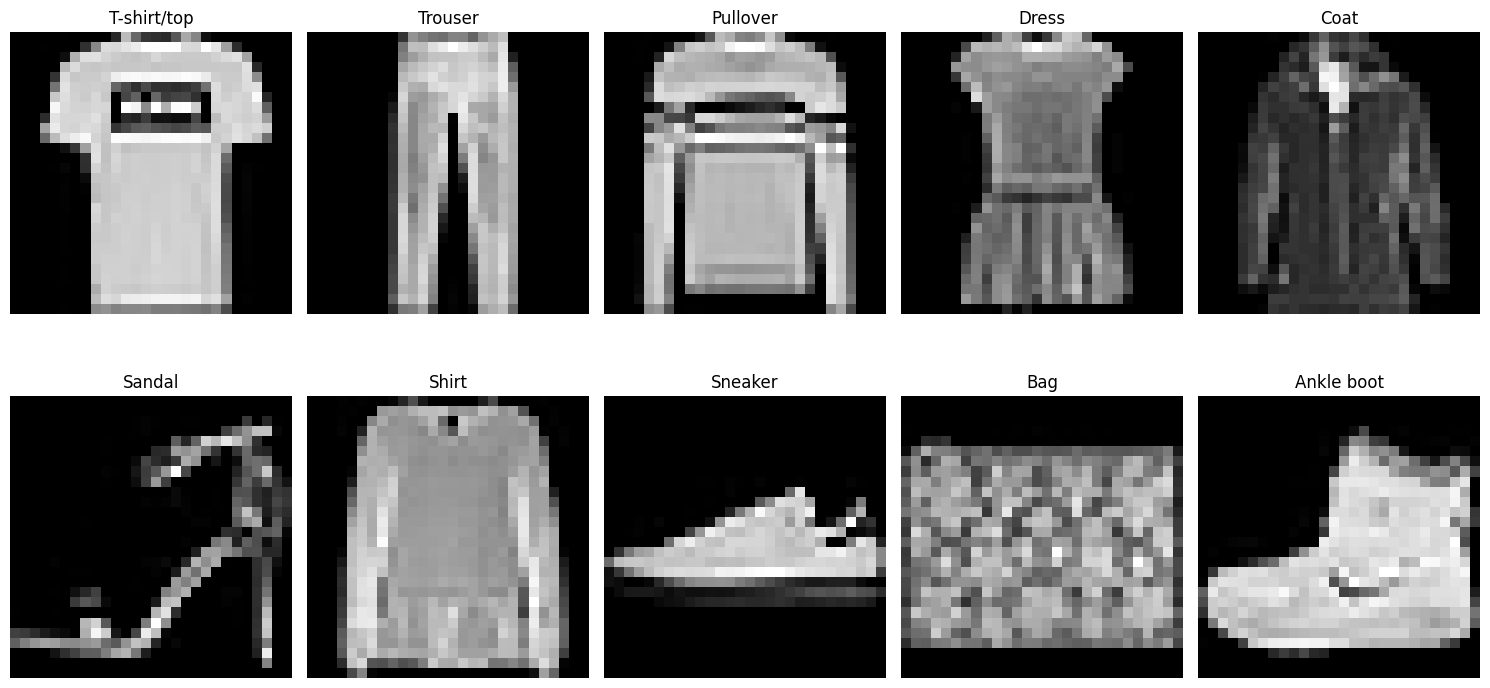

In [8]:
plt.figure(figsize=(15, 8))
for i, class_name in enumerate(class_names):
    image_sample = x_train[y_train == i][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image_sample, cmap='gray')
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

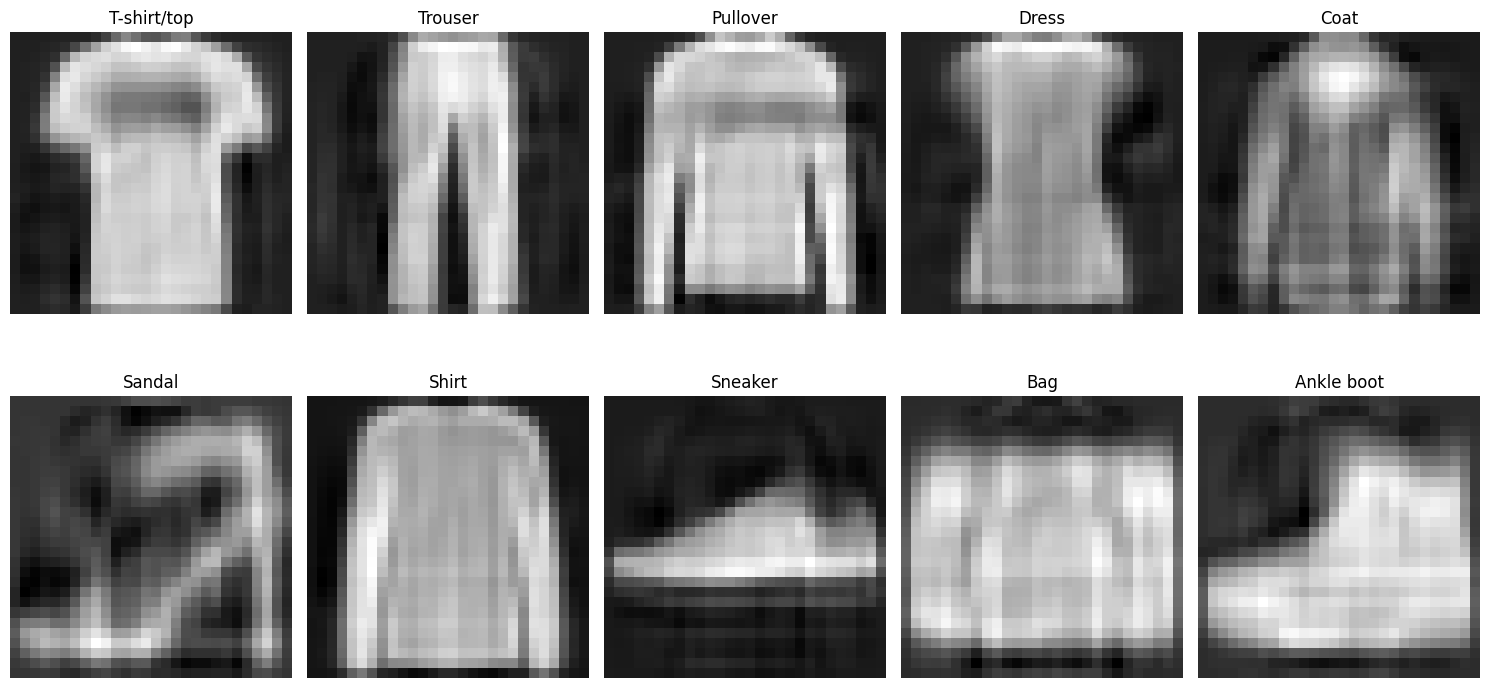

In [9]:
# Reshape x_train and x_test to 2D
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Aplică PCA pe toate pozele
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flat)

# Reconstruiește primele imagini din setul de antrenament și testare
reconstructed_image_train_pca = pca.inverse_transform(x_train_pca[0]).reshape(28, 28)

plt.figure(figsize=(15, 8))
for i, class_name in enumerate(class_names):
    image_sample = x_train_pca[y_train == i][0]
    image_sample = pca.inverse_transform(image_sample).reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image_sample, cmap='gray')
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

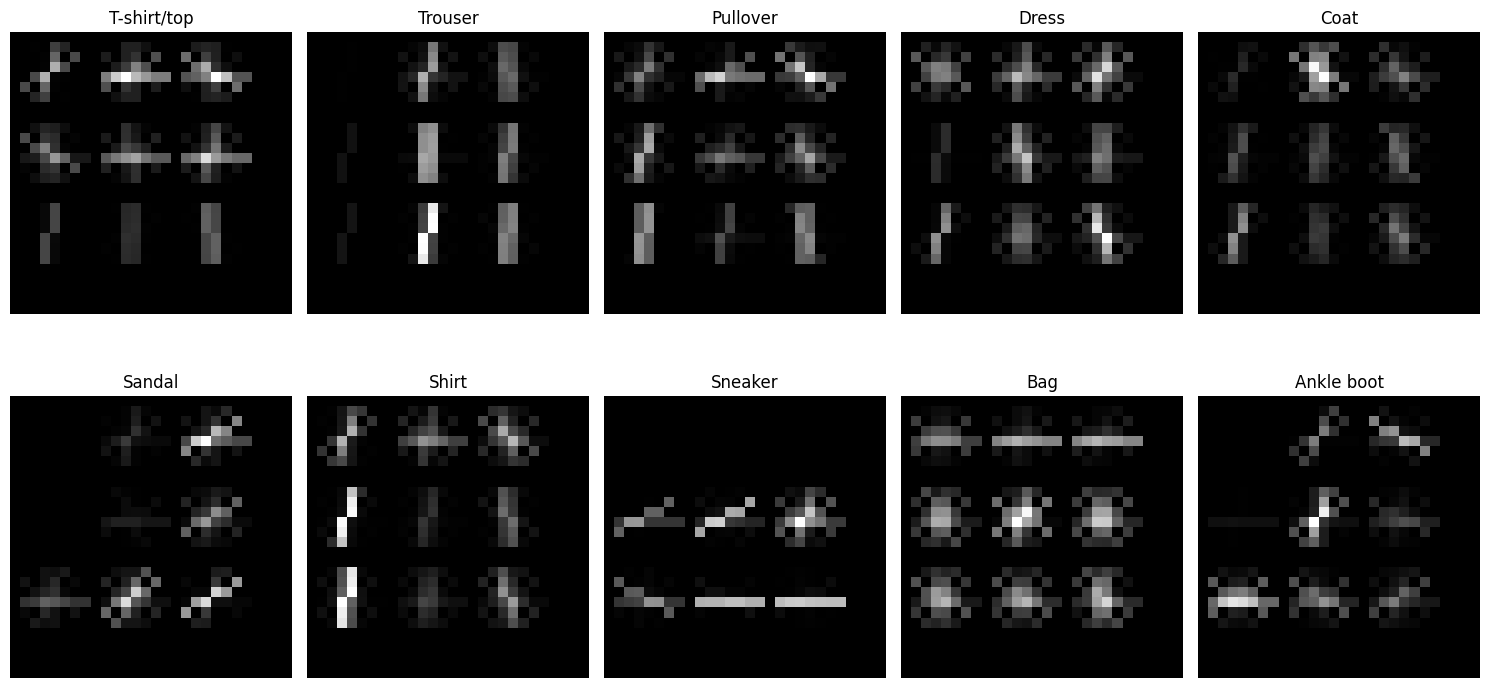

In [10]:


plt.figure(figsize=(15, 8))
for i, class_name in enumerate(class_names):
    image_sample = x_train[y_train == i][0]

    image_sample = image_sample.squeeze()
    _, hog_image = hog(image_sample, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

    plt.subplot(2, 5, i + 1)
    plt.imshow(hog_image, cmap='gray')
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Standardizarea datelor PCA
scaler = StandardScaler()
x_train_pca_standardized = scaler.fit_transform(x_train_pca)

# Dacă ai un set de test pentru PCA
x_test_pca = pca.transform(x_test_flat)  # Aplică transformarea PCA pe datele de test
x_test_pca_standardized = scaler.transform(x_test_pca)

# Afișează formele pentru a verifica
print(x_train_pca.shape, x_test_pca.shape)
print(x_train_pca_standardized.shape, x_test_pca_standardized.shape)


(60000, 50) (10000, 50)
(60000, 50) (10000, 50)


In [16]:
# Calculăm media și deviația standard pentru setul de antrenament
train_mean = x_train_pca_standardized.mean(axis=0)
train_std = x_train_pca_standardized.std(axis=0)

# Calculăm media și deviația standard pentru setul de test
test_mean = x_test_pca_standardized.mean(axis=0)
test_std = x_test_pca_standardized.std(axis=0)

# Afișăm rezultatele
print("Train mean:", train_mean)
print("Train std:", train_std)
print("Test mean:", test_mean)
print("Test std:", test_std)


Train mean: [ 4.13743114e-17  1.59830482e-17 -3.42337270e-17  2.97303848e-17
 -7.48429096e-18 -1.39182647e-18  1.55940076e-17  1.89658474e-17
 -3.61812432e-17 -2.87177689e-17 -1.71464694e-17 -1.24150690e-17
 -3.77327799e-17 -1.71372176e-17  4.41979786e-17  3.04719213e-17
 -4.24947115e-17  6.25851223e-17  3.66630337e-17 -1.22975704e-17
  2.02208620e-17 -1.89663100e-17 -4.10801023e-17  3.67853895e-18
  3.21122758e-17 -2.08906966e-18 -1.95735210e-17  2.17529698e-17
  1.05471187e-19 -3.11084491e-17  7.31220640e-18  5.38180611e-17
  1.76025861e-17 -1.46766858e-17 -2.42222908e-17 -2.07704224e-18
  2.67468917e-17 -1.59895245e-17 -2.92636286e-17 -1.43283533e-17
 -9.07329767e-18 -1.99252651e-17  1.45642757e-17  9.54421727e-18
 -5.31056680e-19  2.46395497e-17  5.17661001e-17  9.29441709e-18
 -2.72115663e-17 -7.54951657e-19]
Train std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Test mean

In [25]:
def apply_hog_fixed(images):
    hog_features = []
    for img in images:
        # Extragere HOG
        feature, _= hog(img.squeeze(), orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True)
        hog_features.append(feature)
    return np.array(hog_features)

hog_features_train = apply_hog_fixed(x_train[:1000])
hog_features_test = apply_hog_fixed(x_test[:1000])

print(f"HOG Features Train Shape: {hog_features_train.shape}")
print(f"HOG Features Test Shape: {hog_features_test.shape}")

# Standardizare
scaler_hog = StandardScaler()
x_train_hog_standardized = scaler_hog.fit_transform(hog_features_train)
x_test_hog_standardized = scaler_hog.transform(hog_features_test)

# Verificare
hog_train_mean = x_train_hog_standardized.mean(axis=0)
hog_train_std = x_train_hog_standardized.std(axis=0)

hog_test_mean = x_test_hog_standardized.mean(axis=0)
hog_test_std = x_test_hog_standardized.std(axis=0)

print("HOG Train mean:", hog_train_mean[:10])  # Doar primele 10 valori
print("HOG Train std:", hog_train_std[:10])
print("HOG Test mean:", hog_test_mean[:10])
print("HOG Test std:", hog_test_std[:10])


HOG Features Train Shape: (1000, 144)
HOG Features Test Shape: (1000, 144)
HOG Train mean: [-4.12558876e-16 -1.94032290e-16  2.35145237e-16 -7.69162511e-16
 -2.66453526e-17 -4.01900735e-16 -1.17128529e-16  2.56905608e-16
 -2.12309337e-16  1.54876112e-15]
HOG Train std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
HOG Test mean: [ 0.06421907  0.06102234  0.08525814 -0.02658502 -0.00222228 -0.03389312
 -0.00625671 -0.0503359   0.06244915  0.04270723]
HOG Test std: [1.01067988 0.99809981 1.02455629 0.92527544 0.98084454 0.89842352
 0.95478253 0.79623786 1.05350224 0.95896255]
